In [2]:
import tensorflow as tf
import keras
import cv2
import os
from tqdm import tqdm as tqdm
from multiprocessing import Pool


2025-04-20 09:44:40.351381: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745142281.282705   17154 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745142281.545060   17154 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745142283.662139   17154 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745142283.662166   17154 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745142283.662168   17154 computation_placer.cc:177] computation placer alr

In [3]:
loaded_model = keras.saving.load_model("./models/generator_epoch_250.h5")

I0000 00:00:1745142323.738827   17154 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13553 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Ti SUPER, pci bus id: 0000:07:00.0, compute capability: 8.9


In [4]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 49152)          │     4,915,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 128)  │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 128)    │       262,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 256)    │       524,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │     1,048,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 512)    │     2,097,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 16, 16, 512)    │     4,194,304 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 512)    │     4,194,304 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32, 32, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 256)    │     2,097,152 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 64, 64, 256)    │     1,048,576 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 128, 128, 128)  │       524,288 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 21,185,539 (80.82 MB)

 Trainable params: 21,182,979 (80.81 MB)

 Non-trainable params: 2,560 (10.00 KB)

In [5]:
import numpy as np
import matplotlib.pyplot as plt




I0000 00:00:1745142328.703469   17154 cuda_dnn.cc:529] Loaded cuDNN version 90300


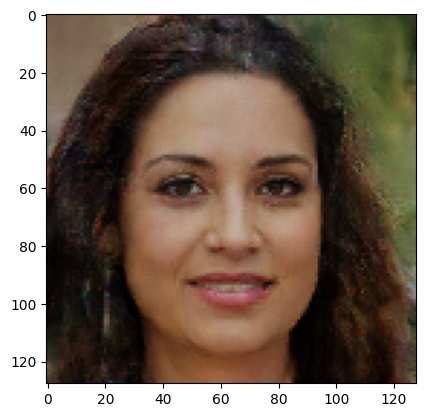

In [6]:
x = np.random.normal(0,1,(1,100))  #np.random.normal(0,1,(1,latent_dim))
img = loaded_model(x)

plt.imshow(np.clip((img[0,...]+1)/2*0.8, 0, 1))

In [7]:
discriminator = keras.saving.load_model('./models/discriminator_epoch_250.h5')

In [8]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 128)    │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │       262,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       524,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 256)      │     1,048,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,097,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         8,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,949,569 (15.07 MB)

 Trainable params: 3,948,033 (15.06 MB)

 Non-trainable params: 1,536 (6.00 KB)

I0000 00:00:1745142334.127787   17397 service.cc:152] XLA service 0x7fbf9c004690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745142334.127806   17397 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti SUPER, Compute Capability 8.9
2025-04-20 09:45:34.325771: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
fake


I0000 00:00:1745142335.492312   17397 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


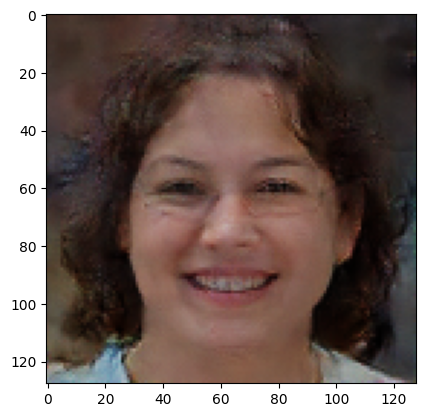

In [9]:
x = np.random.normal(0,1,(1,100))  #np.random.normal(0,1,(1,latent_dim))
img = loaded_model(x)

plt.imshow(np.clip((img[0,...]+1)/2*0.8, 0, 1))
if discriminator.predict(img) > 0.5:
    print('real')
else:
    print('fake')

In [10]:

# # print(os.listdir('./dataset/without_mask'))
# real_count = 0
# fake_count = 0
# for i in tqdm(range(0,len(os.listdir('./dataset/without_mask')))):
#     x = 'dataset/without_mask/'+os.listdir('./dataset/without_mask')[i]
#     # print(x)

#     imgn = cv2.imread(x)
#     imgn = cv2.cvtColor(imgn, cv2.COLOR_BGR2RGB)
        
#     #resizing image
#     imgn = cv2.resize(imgn, (128, 128))
#     imgn = (imgn - 127.5) / 127.5

#     imgn = imgn.astype(float)
#     imgn = np.expand_dims(imgn, axis=0)
#     # print(imgn)
#     if discriminator(imgn) > 0.5:
#         real_count+=1
#     else:
#         fake_count+=1

In [11]:
image_dir = './dataset/without_mask'
image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir)]

print(image_paths)

['./dataset/without_mask/seed0000.png', './dataset/without_mask/seed0001.png', './dataset/without_mask/seed0002.png', './dataset/without_mask/seed0003.png', './dataset/without_mask/seed0004.png', './dataset/without_mask/seed0005.png', './dataset/without_mask/seed0006.png', './dataset/without_mask/seed0007.png', './dataset/without_mask/seed0008.png', './dataset/without_mask/seed0009.png', './dataset/without_mask/seed0010.png', './dataset/without_mask/seed0011.png', './dataset/without_mask/seed0012.png', './dataset/without_mask/seed0013.png', './dataset/without_mask/seed0014.png', './dataset/without_mask/seed0015.png', './dataset/without_mask/seed0016.png', './dataset/without_mask/seed0017.png', './dataset/without_mask/seed0018.png', './dataset/without_mask/seed0019.png', './dataset/without_mask/seed0020.png', './dataset/without_mask/seed0021.png', './dataset/without_mask/seed0022.png', './dataset/without_mask/seed0023.png', './dataset/without_mask/seed0024.png', './dataset/without_mask/

In [12]:
# img_list = []
def worker(x):
    imgn = cv2.imread(x)
    imgn = cv2.cvtColor(imgn, cv2.COLOR_BGR2RGB)
    imgn = cv2.resize(imgn, (128, 128))
    imgn = (imgn - 127.5) / 127.5
    imgn = imgn.astype(float)
    imgn = np.expand_dims(imgn, axis=0)
    # img_list.append(imgn)
    # return 'real' if pred > 0.5 else 'fake'
    return imgn



In [13]:
worker('./dataset/without_mask/seed0000.png')

array([[[[ 0.27843137,  0.2       ,  0.08235294],
         [ 0.29411765,  0.20784314,  0.10588235],
         [ 0.27058824,  0.19215686,  0.08235294],
         ...,
         [ 0.34117647,  0.27058824,  0.18431373],
         [ 0.37254902,  0.27843137,  0.2       ],
         [ 0.36470588,  0.27843137,  0.17647059]],

        [[ 0.27843137,  0.2       ,  0.09019608],
         [ 0.27843137,  0.2       ,  0.09803922],
         [ 0.27058824,  0.2       ,  0.10588235],
         ...,
         [ 0.34117647,  0.27058824,  0.18431373],
         [ 0.34901961,  0.27058824,  0.18431373],
         [ 0.34901961,  0.27058824,  0.18431373]],

        [[ 0.27058824,  0.2       ,  0.09803922],
         [ 0.27058824,  0.19215686,  0.09019608],
         [ 0.2627451 ,  0.18431373,  0.09803922],
         ...,
         [ 0.34117647,  0.2627451 ,  0.16862745],
         [ 0.3254902 ,  0.25490196,  0.16862745],
         [ 0.33333333,  0.2627451 ,  0.16078431]],

        ...,

        [[ 0.27058824,  0.21568627,  0

In [14]:

with Pool(processes=os.cpu_count()) as pool:
    results = list(tqdm(pool.imap(worker, image_paths), total=len(image_paths)))

100%|██████████| 10000/10000 [02:36<00:00, 63.93it/s]


In [15]:
# Now in main process
batch_imgs = np.array(results)  # shape: (N, 128, 128, 3)


In [16]:
print(batch_imgs[0])

[[[[ 0.27843137  0.2         0.08235294]
   [ 0.29411765  0.20784314  0.10588235]
   [ 0.27058824  0.19215686  0.08235294]
   ...
   [ 0.34117647  0.27058824  0.18431373]
   [ 0.37254902  0.27843137  0.2       ]
   [ 0.36470588  0.27843137  0.17647059]]

  [[ 0.27843137  0.2         0.09019608]
   [ 0.27843137  0.2         0.09803922]
   [ 0.27058824  0.2         0.10588235]
   ...
   [ 0.34117647  0.27058824  0.18431373]
   [ 0.34901961  0.27058824  0.18431373]
   [ 0.34901961  0.27058824  0.18431373]]

  [[ 0.27058824  0.2         0.09803922]
   [ 0.27058824  0.19215686  0.09019608]
   [ 0.2627451   0.18431373  0.09803922]
   ...
   [ 0.34117647  0.2627451   0.16862745]
   [ 0.3254902   0.25490196  0.16862745]
   [ 0.33333333  0.2627451   0.16078431]]

  ...

  [[ 0.27058824  0.21568627  0.15294118]
   [ 0.30196078  0.19215686  0.04313725]
   [ 0.20784314  0.08235294 -0.01960784]
   ...
   [ 0.14509804 -0.00392157 -0.12941176]
   [ 0.12941176  0.01960784 -0.11372549]
   [ 0.22352941 

In [17]:
discriminator.predict(batch_imgs[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.9999993]], dtype=float32)

In [18]:
print(batch_imgs.shape)

(10000, 1, 128, 128, 3)


In [19]:
range(0, batch_imgs.shape[0], 256)

range(0, 10000, 256)

In [20]:
real_count = 0
fake_count = 0

for i in tqdm(range(0, batch_imgs.shape[0], 256)):
    batch = batch_imgs[i:i + 256]
    batch = tf.convert_to_tensor(batch, dtype=tf.float32)

    # Remove the unnecessary 1-dim at position 1
    batch = tf.squeeze(batch, axis=1)
    # print(batch.shape)
    x = discriminator.predict(batch, verbose=0)

    real_count += np.sum(x > 0.5)
    fake_count += np.sum(x <= 0.5)

print(real_count)
print(fake_count)


  0%|          | 0/40 [00:00<?, ?it/s]2025-04-20 09:48:17.938060: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng53{k2=8,k13=1,k14=3,k18=0,k23=0} for conv %cudnn-conv.5 = (f32[32,128,64,64]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,128,128]{3,2,1,0} %bitcast.495, f32[128,3,4,4]{3,2,1,0} %bitcast.502), window={size=4x4 stride=2x2 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", metadata={op_type="Conv2D" op_name="sequential_1_1/conv2d_5_1/convolution" source_file="/mnt/e/Study/GAN practice/venv/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2025-04-20 09:48:18.028700: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation t

9830
170


In [21]:
x_list = []
# x = np.random.normal(0,1,(1,100))
for i in tqdm(range(10000)):
    x_list.append(np.random.normal(0,1,(1,100)))
    

100%|██████████| 10000/10000 [00:00<00:00, 276627.16it/s]


In [22]:
img = []
for i in tqdm(range(0,10000)):
    img.append(loaded_model(x_list[i]))

100%|██████████| 10000/10000 [03:30<00:00, 47.42it/s]


In [23]:
len(img)

10000

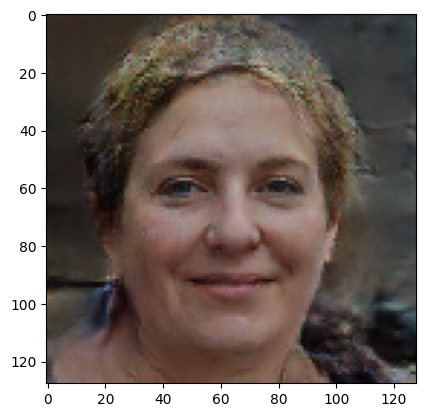

In [24]:
plt.imshow(np.clip(np.squeeze(img[0])+1)/2*0.8)

In [25]:
real_count = 0
fake_count = 0
img = np.array(img)
for i in tqdm(range(0, 10000, 256)):
    batch_img = img[i:i + 256]

    print(batch_img.shape)
    # Predict on just this batch
    x = discriminator.predict(batch_img, verbose=0)

    real_count += np.sum(x > 0.5)
    fake_count += np.sum(x <= 0.5)

print(real_count)
print(fake_count)

  0%|          | 0/40 [00:00<?, ?it/s]


(256, 1, 128, 128, 3)


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None